In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re
import matplotlib.pyplot as plt

In [2]:
def HLA_cd8_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace(",", "").replace("'","").split(" ")

def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def epitope_converter(x):
    #define format of datetime
    return [y for y in x.replace("[","").replace("]","").replace("\n","").split("'") if (y != '') & (y != ' ')]

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("\n","").replace("'",""))

def literal_converter(val):
    # replace NaN with '' and perform literal eval on the rest
    return [] if val == '' else literal_eval(val)

converters = {'peptide_HLA_lst': peptide_hla_converter,
              'umi_count_lst_mhc': literal_eval,
              'umi_count_lst_TRA': literal_converter,'umi_count_lst_TRB': literal_converter,
              'cdr3_lst_TRA': cdr3_lst_converter,
              'cdr3_lst_TRB': cdr3_lst_converter,
              'HLA_lst_mhc': cdr3_lst_converter,'HLA_cd8': HLA_cd8_converter} #
converters = {'peptide_HLA_lst': peptide_hla_converter,
              'umi_count_lst_mhc': literal_eval,
              'umi_count_lst_cd8': literal_converter,
              'umi_count_lst_TRA': literal_converter,'umi_count_lst_TRB': literal_converter,
              'cdr3_lst_TRA': cdr3_lst_converter,
              'cdr3_lst_TRB': cdr3_lst_converter,
              'HLA_lst_mhc': cdr3_lst_converter,
              'HLA_pool_cd8':cdr3_lst_converter,
              'HLA_cd8': HLA_cd8_converter,
              'HLA_lst_cd8':literal_converter,'sample_id_lst':literal_converter} #

In [3]:
import sys  
sys.path.insert(0, '../scripts')

from D_plot_specificity_matrix_utils import (peptide_per_clonotype_by_gem_size,
                                             multiple_peptides_per_gem_w_filtering,
                                             calc_binding_concordance,
                                             epitope_sorter_index,
                                             peptides_per_gem)

In [4]:
cluster_peptides = pd.read_csv('peptide_clusters.csv', index_col=0)
cluster_hashing = pd.read_csv('hashing_clusters.csv', index_col=0)

In [4]:
OS1 = '../experiments/exp13/run1/cat/tables/tcr_barcode.cleaned.csv'
OS2 = '../experiments/exp13/run2/cat/tables/tcr_barcode.cleaned.csv'#cleaned.

In [6]:
os1 = pd.read_csv(OS1, converters=converters)
os2 = pd.read_csv(OS2, converters=converters)

In [7]:
os1.rename(columns={'rank':'epitope_rank'},inplace=True)
os2.rename(columns={'rank':'epitope_rank'},inplace=True)

In [7]:
os1.HLA_match.fillna(False, inplace=True)
os2.HLA_match.fillna(False, inplace=True)

In [8]:
flt = os2[(os2.umi_count_mhc >= 14) & (os2.delta_umi_mhc >= 5)] #& (os2.HLA_match == True)

In [8]:
lol = os1.merge(cluster_peptides, left_on='gem', right_index=True).merge(cluster_hashing, left_on='gem', right_index=True, suffixes=['','_hsh'])

In [9]:
#lol = lol[~lol.clusters.isin([5,8])].copy()

In [ ]:
lol.rename(columns={'peptide_HLA':'old_peptide_HLA','top_cluster_peptide':'peptide_HLA'}, inplace=True)

In [ ]:
lol = calc_binding_concordance(lol, 'ct')

In [ ]:
lol.loc[lol.binding_concordance < 0.5,
        ['ct','ct_pep','sample_id','HLA_cd8','old_peptide_HLA','peptide_HLA_lst','umi_count_lst_mhc','clusters',
         'peptide_HLA','top_cluster_peptide_hsh']].sort_values(by='ct').head(60)

,ct,ct_pep,sample_id,HLA_cd8,old_peptide_HLA,peptide_HLA_lst,umi_count_lst_mhc,clusters,peptide_HLA,top_cluster_peptide_hsh
5028,1.0,VLEETSVML A0201,1.0,[A0201],YVLDHLIVV A0201,"[TPSVSSSISSL B0702, RVRAYTYSK A0301, YVLDHLIVV...","[1.0, 4.0, 19.0]",3,YVLDHLIVV,251
5626,1.0,VLEETSVML A0201,10.0,"[A0201, A0301]",YVLDHLIVV A0201,"[TPRVTGGGAM B0702, VLEETSVML A0201, YVLDHLIVV ...","[3.0, 23.0, 76.0]",3,YVLDHLIVV,260
5726,1.0,VLEETSVML A0201,10.0,"[A0201, A0301]",RVRAYTYSK A0301,[RVRAYTYSK A0301],[2.0],0,RVRAYTYSK,260
6137,1.0,VLEETSVML A0201,2.0,[A0201],RVRAYTYSK A0301,"[VLEETSVML A0201, RPHERNGFTVL B0702, RVRAYTYSK...","[1.0, 1.0, 3.0]",12,RVRAYTYSK,252
1375,1.0,VLEETSVML A0201,10.0,"[A0201, A0301]",RPPIFIRRL B0702,"[VLEETSVML A0201, RVRAYTYSK A0301, RPPIFIRRL B...","[1.0, 1.0, 2.0]",7,RPPIFIRRL,260
4813,1.0,VLEETSVML A0201,9.0,[B0702],TPRVTGGGAM B0702,"[VLEETSVML A0201, RVRAYTYSK A0301, TPRVTGGGAM ...","[1.0, 2.0, 11.0]",1,TPRVTGGGAM,259
733,1.0,VLEETSVML A0201,10.0,"[A0201, A0301]",RVRAYTYSK A0301,"[RPHERNGFTV B0702, TPRVTGGGAM B0702, VLEETSVML...","[1.0, 2.0, 30.0, 45.0]",12,RVRAYTYSK,260
5575,1.0,VLEETSVML A0201,7.0,[B0702],TPRVTGGGAM B0702,"[RVRAYTYSK A0301, TPRVTGGGAM B0702]","[1.0, 3.0]",1,TPRVTGGGAM,257
6752,1.0,VLEETSVML A0201,10.0,"[A0201, A0301]",YVLDHLIVV A0201,"[CLGGLLTMV A0201, RVRAYTYSK A0301, VLEETSVML A...","[1.0, 1.0, 9.0, 10.0]",3,YVLDHLIVV,260
6793,1.0,VLEETSVML A0201,10.0,"[A0201, A0301]",RVRAYTYSK A0301,[RVRAYTYSK A0301],[2.0],0,RVRAYTYSK,260


{3077, 5126, 4104, 1528, 4109, 1549, 4631, 3099, 2589, 2592, 1581, 3630, 5680, 2102, 1600, 5202, 2136, 1624, 5726, 6752, 3698, 1650, 6260, 5756, 2687, 4735, 641, 3203, 6280, 6793, 6282, 6797, 1679, 5264, 2707, 2197, 4253, 6304, 6827, 6829, 5827, 3271, 1735, 4813, 2776, 4828, 733, 2783, 2272, 6881, 6893, 6387, 2293, 2806, 6909, 4353, 2311, 5906, 4883, 3349, 6936, 4890, 3360, 4388, 808, 4907, 6957, 2862, 5933, 2356, 842, 2894, 1375, 5472, 2402, 3428, 2916, 2923, 3950, 366, 7023, 1392, 3448, 4984, 2429, 7042, 3970, 394, 398, 3471, 2446, 6542, 405, 1944, 3480, 6044, 6048, 5028, 6053, 422, 2988, 7085, 1965, 5550, 6578, 5561, 4539, 6076, 7110, 5575, 1500, 5089, 6115, 6119, 3565, 3570, 5620, 2040, 6137, 5626}


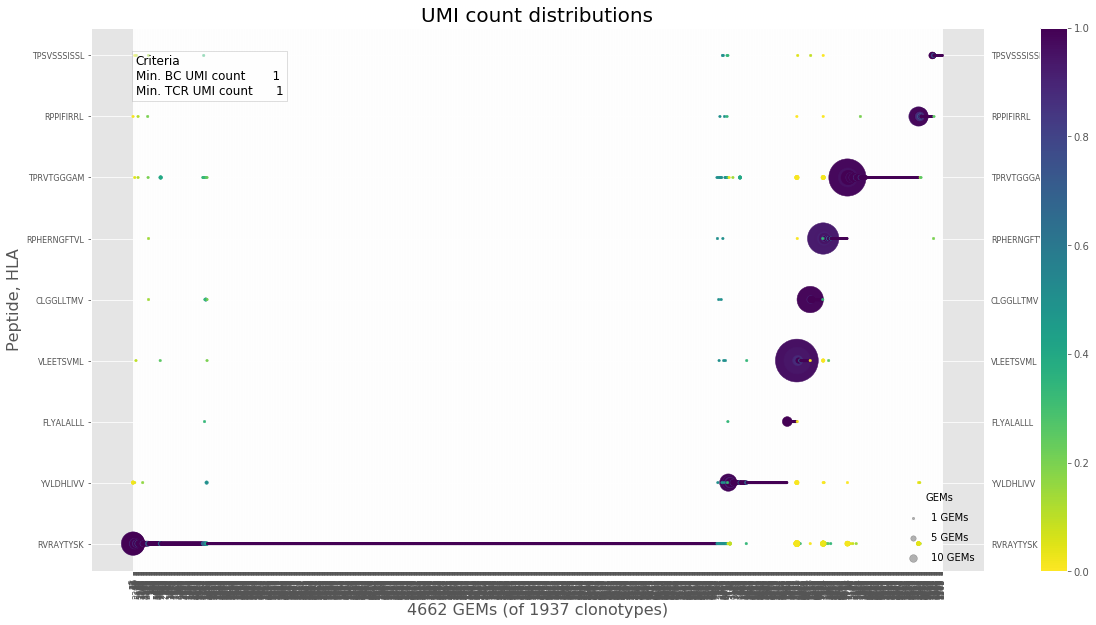

OBS! Figures are not saved!


In [43]:
peptide_per_clonotype_by_gem_size(lol, y='peptide_HLA', color_by_hashing=False, save_tuba='specificity.cluster.os1.png', show=True)

{3077, 5126, 4104, 1528, 3082, 4109, 1549, 4631, 3099, 2589, 2592, 1581, 3630, 5680, 2102, 1600, 5202, 1624, 2136, 5726, 6752, 1650, 3698, 6260, 5756, 2687, 4735, 641, 3203, 6280, 6793, 6282, 6797, 654, 1679, 5264, 2707, 2197, 4253, 6304, 6827, 6829, 5827, 3271, 1735, 4813, 2776, 4828, 733, 2783, 2272, 6881, 6893, 6387, 3827, 2293, 2806, 6909, 4353, 2311, 5906, 4883, 3349, 6936, 4890, 3360, 4388, 808, 4907, 6957, 2862, 5933, 2356, 842, 2894, 1375, 5472, 2402, 3428, 2916, 2923, 366, 3950, 7023, 1392, 4984, 3448, 2429, 7042, 3970, 394, 398, 3471, 6542, 2446, 405, 1944, 3480, 6044, 6048, 5028, 6053, 422, 2988, 7085, 5550, 6578, 5561, 4539, 6076, 7110, 5575, 3543, 1500, 5089, 6115, 6119, 3570, 5620, 2040, 6137, 5626}


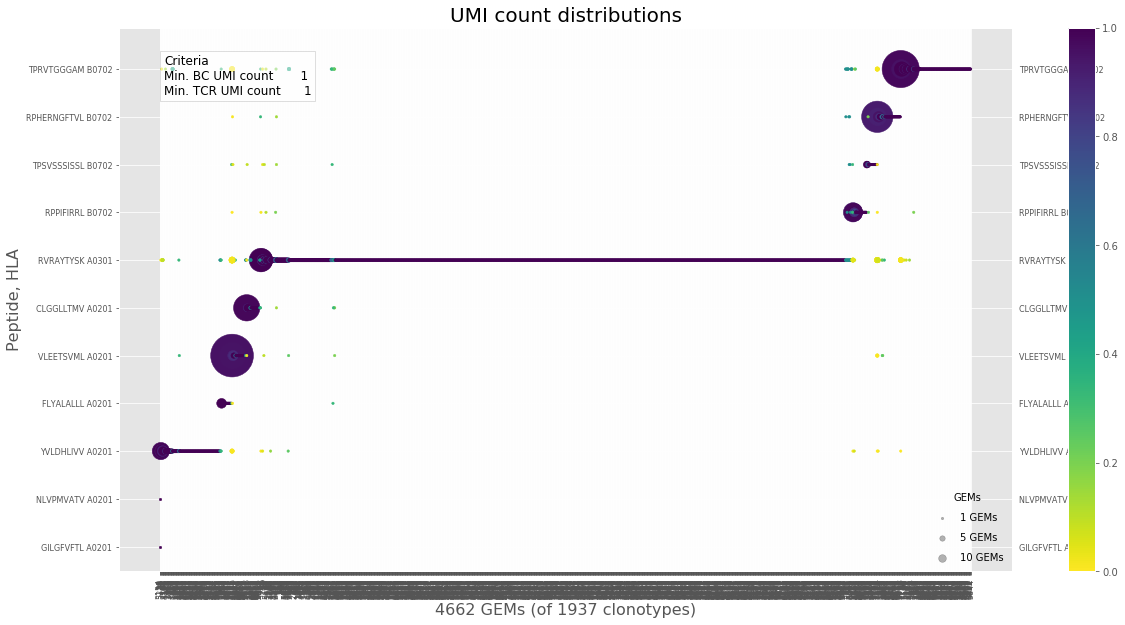

OBS! Figures are not saved!


In [41]:
peptide_per_clonotype_by_gem_size(lol, y='peptide_HLA', color_by_hashing=False, save_tuba='specificity.cluster.os1.png', show=True)

In [10]:
peptide_per_clonotype_by_gem_size(flt, y='peptide_HLA', color_by_hashing=False, save_tuba='specificity.14.5.os2.png', show=False)

{8, 26, 1052, 31, 545, 36, 551, 554, 2091, 63, 1603, 583, 1609, 76, 1101, 81, 1623, 2136, 1626, 1627, 92, 1629, 1632, 2146, 1635, 610, 98, 100, 2149, 2152, 617, 619, 113, 1139, 629, 1653, 642, 656, 1173, 160, 1195, 1708, 1201, 181, 1719, 699, 700, 1725, 190, 195, 201, 714, 1738, 1748, 730, 223, 737, 228, 1255, 1256, 745, 1771, 236, 1259, 239, 248, 1281, 1283, 774, 781, 274, 279, 1819, 289, 802, 1827, 1319, 1843, 1332, 309, 821, 1849, 1868, 851, 856, 858, 1883, 1378, 357, 370, 1394, 372, 1919, 897, 899, 388, 1418, 1422, 913, 421, 1962, 1464, 1978, 443, 960, 449, 451, 1487, 1488, 2000, 2003, 469, 982, 1495, 2005, 473, 1497, 989, 483, 2023, 507, 1022}


In [13]:
flt.columns

Index(['gem', 'clonotype', 'num_clonotype', 'ct', 'genes_TRA', 'genes_TRB',
       'genes_lst_TRA', 'genes_lst_TRB', 'length_TRA', 'cdr1_TRA', 'cdr2_TRA',
       'cdr3_TRA', 'umi_count_TRA', 'umi_count_lst_TRA', 'delta_umi_TRA',
       'cdr3_lst_TRA', 'chain_count_TRA', 'single_TRA', 'length_TRB',
       'cdr1_TRB', 'cdr2_TRB', 'cdr3_TRB', 'umi_count_TRB',
       'umi_count_lst_TRB', 'delta_umi_TRB', 'cdr3_lst_TRB', 'chain_count_TRB',
       'single_TRB', 'single_chain_only', 'umi_count_tcr', 'cdr3_comb',
       'v_gene_TRA', 'j_gene_TRA', 'v_gene_TRB', 'j_gene_TRB', 'tcr_category',
       'no_filtration', 'exclude_single-chain_TCRs',
       'exclude_ambiguous_and_single-chain_TCRs', 'exclude_ambiguous_TCRs',
       'label', 'umi_count_mhc', 'umi_count_lst_mhc', 'delta_umi_mhc',
       'single_barcode_mhc', 'multiplets_mhc', 'umi_count_cd8',
       'umi_count_lst_cd8', 'delta_umi_cd8', 'single_barcode_cd8',
       'multiplets_cd8', 'detected_response', 'peptide_assayed', 'sample_id',
 

In [20]:
flt.loc[(flt.peptide_HLA == 'RVRAYTYSK A0301') & (flt.HLA_match == False), ['peptide_HLA','peptide_HLA_lst','umi_count_mhc','umi_count_cd8','HLA_cd8','HLA_lst_cd8']]

,peptide_HLA,peptide_HLA_lst,umi_count_mhc,umi_count_cd8,HLA_cd8,HLA_lst_cd8
0,RVRAYTYSK A0301,[RVRAYTYSK A0301],20.0,1675.0,"[A0201, B0702]","[[A0201], [B0702], [A0201], [A0301, B0702], [A..."
16,RVRAYTYSK A0301,[RVRAYTYSK A0301],22.0,3323.0,[A0201],"[[A0201], [A0301, B0702], [A0201, A0301], [B07..."
20,RVRAYTYSK A0301,[RVRAYTYSK A0301],23.0,1066.0,[B0702],"[[A0301, B0702], [A0201], [A0201, B0702], [B07..."
26,RVRAYTYSK A0301,[RVRAYTYSK A0301],17.0,3395.0,[B0702],"[[A0201], [A0301, B0702], [A0301, B0702], [A02..."
41,RVRAYTYSK A0301,"[VLEETSVML A0201, TPSVSSSISSL B0702, RPPIFIRRL...",27.0,3151.0,[A0201],"[[A0201], [A0301, B0702], [A0301, B0702], [A02..."
...,...,...,...,...,...,...
2162,RVRAYTYSK A0301,[RVRAYTYSK A0301],26.0,1670.0,[A0201],"[[A0301, B0702], [B0702], [A0201, B0702], [A02..."
2169,RVRAYTYSK A0301,[RVRAYTYSK A0301],22.0,1738.0,[A0201],"[[A0201, B0702], [A0201], [B0702], [A0301, B07..."
2170,RVRAYTYSK A0301,[RVRAYTYSK A0301],24.0,1547.0,[A0201],"[[A0201], [A0301, B0702], [A0201, B0702], [B07..."
2180,RVRAYTYSK A0301,[RVRAYTYSK A0301],27.0,2049.0,[A0201],"[[A0301, B0702], [B0702], [A0301, B0702], [B07..."


In [8]:
multiple_peptides_per_gem_w_filtering(os1, y='peptide_HLA', color_by_hashing=True,
                                      save_tuba='multiplets_per_pep_color_hla.os1.png', show=False)



Inside multiple_peptides_per_gem_w_filtering


In [8]:
peptide_per_clonotype_by_gem_size(os2, y='peptide_HLA', color_by_hashing=True, save_tuba='specificity.color_by_hla.os2.png', show=False)

any 0 gems_per_spec_hla_match? False
any NaN gems_per_spec_hla_match? True
any NaN hla_concordance? True
{8, 522, 1034, 524, 530, 1043, 2069, 1045, 2071, 26, 1052, 31, 1056, 545, 36, 551, 2089, 554, 2091, 556, 1581, 1577, 47, 1075, 2099, 63, 1599, 1603, 1606, 583, 1609, 76, 1101, 79, 2129, 81, 83, 1107, 1623, 2136, 601, 1626, 1627, 92, 1629, 2141, 1632, 610, 98, 1124, 2146, 1635, 100, 2152, 617, 2149, 619, 113, 1137, 1139, 629, 1653, 119, 2173, 642, 656, 1680, 1173, 1691, 160, 161, 1195, 1708, 1712, 1201, 181, 1717, 1719, 699, 700, 1725, 190, 704, 705, 195, 201, 714, 1738, 1748, 725, 1241, 730, 1754, 222, 223, 737, 228, 740, 1254, 1255, 1256, 745, 1770, 1771, 236, 1259, 239, 1269, 248, 1788, 1281, 1283, 774, 1288, 777, 781, 786, 274, 789, 279, 1819, 1822, 800, 289, 802, 1827, 294, 1319, 306, 1843, 1332, 309, 821, 1847, 1848, 1849, 1859, 326, 1354, 1866, 1868, 1357, 1358, 851, 1367, 856, 858, 1883, 1372, 1378, 357, 1894, 877, 369, 370, 371, 1394, 372, 1403, 1405, 1919, 897, 1410, 1923, 

In [8]:
peptide_per_clonotype_by_gem_size(os2, y='peptide_HLA', color_by_hashing=None, save_tuba='specificity.os2.png', show=False)

{8, 522, 1034, 524, 530, 1043, 2069, 1045, 2071, 26, 1052, 31, 1056, 545, 36, 551, 2089, 554, 2091, 556, 1581, 1577, 47, 1075, 2099, 63, 1599, 1603, 1606, 583, 1609, 76, 1101, 79, 2129, 81, 83, 1107, 1623, 2136, 601, 1626, 1627, 92, 1629, 2141, 1632, 610, 98, 1124, 2146, 1635, 100, 2152, 617, 2149, 619, 113, 1137, 1139, 629, 1653, 119, 2173, 642, 656, 1680, 1173, 1691, 160, 161, 1195, 1708, 1712, 1201, 181, 1717, 1719, 699, 700, 1725, 190, 704, 705, 195, 201, 714, 1738, 1748, 725, 1241, 730, 1754, 222, 223, 737, 228, 740, 1254, 1255, 1256, 745, 1770, 1771, 236, 1259, 239, 1269, 248, 1788, 1281, 1283, 774, 1288, 777, 781, 786, 274, 789, 279, 1819, 1822, 800, 289, 802, 1827, 294, 1319, 306, 1843, 1332, 309, 821, 1847, 1848, 1849, 1859, 326, 1354, 1866, 1868, 1357, 1358, 851, 1367, 856, 858, 1883, 1372, 1378, 357, 1894, 877, 369, 370, 371, 1394, 372, 1403, 1405, 1919, 897, 1410, 1923, 388, 899, 1418, 908, 1422, 1424, 913, 1939, 918, 1949, 421, 934, 1962, 942, 1969, 950, 1464, 1978, 443, 9

In [10]:
os2.loc[os2.HLA_match.isna(), ['peptide_HLA','HLA_cd8','HLA_match']]

,peptide_HLA,HLA_cd8,HLA_match
324,TPRVTGGGAM B0702,[],NaN
1797,RVRAYTYSK A0301,[],NaN
1943,CLGGLLTMV A0201,[],NaN


In [8]:
multiple_peptides_per_gem_w_filtering(os1[(os1.umi_count_mhc >= 2) & (os1.delta_umi_mhc >= 1)], y='peptide_HLA', save_tuba='multiplets_per_pep.os1.png', show=False)
multiple_peptides_per_gem_w_filtering(os2[(os2.umi_count_mhc >= 2) & (os2.delta_umi_mhc >= 1)], y='peptide_HLA', save_tuba='multiplets_per_pep.os2.png', show=False)

Inside multiple_peptides_per_gem_w_filtering


../scripts/D_plot_specificity_matrix_utils.py:454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tcr_category'] = pd.Categorical(df.tcr_category, categories=['unique chains', 'multiple chains', 'missing chain'], ordered=True)


Inside multiple_peptides_per_gem_w_filtering


In [9]:
multiple_peptides_per_gem_w_filtering(os1[(os1.umi_count_mhc >= 2) & (os1.delta_umi_mhc >= 1)], y='sample_id', save_tuba='multiplets.os1.png', show=False)

Inside multiple_peptides_per_gem_w_filtering


In [10]:
multiple_peptides_per_gem_w_filtering(os2[(os2.umi_count_mhc >= 2) & (os2.delta_umi_mhc >= 1)], y='sample_id', save_tuba='multiplets.os2.png', show=False)

Inside multiple_peptides_per_gem_w_filtering


In [11]:
peptide_per_clonotype_by_gem_size(os1[(os1.umi_count_mhc >= 2) & (os1.delta_umi_mhc >= 1)], y='sample_id', save_tuba='specificity.os1.png', show=False)

{7042, 7044, 5126, 6280, 7049, 6282, 4104, 6797, 2446, 3215, 654, 7056, 5138, 4883, 3349, 4631, 6936, 4890, 3360, 2592, 6048, 5028, 6436, 6053, 422, 5933, 2862, 7085, 5680, 6829, 6578, 2356, 5561, 4538, 6076, 5827, 7110, 3271, 1735, 5575, 4813, 1613, 1500, 5471, 5472, 2783, 5089, 2916, 6119, 3570, 5620, 2293, 4984, 5756}


{5126, 4104, 5138, 4631, 2071, 31, 2592, 1577, 2089, 5680, 1613, 2129, 81, 100, 619, 1653, 5756, 6280, 6282, 6797, 654, 3215, 6829, 1712, 1717, 1719, 1725, 5827, 3271, 1735, 4813, 2783, 737, 1255, 2293, 4883, 3349, 6936, 4890, 3360, 1827, 6436, 5933, 2862, 306, 2356, 1849, 1354, 5471, 5472, 2916, 357, 1394, 372, 4984, 1919, 7042, 7044, 7049, 1418, 2446, 7056, 1949, 6048, 5028, 6053, 422, 7085, 6578, 5561, 4538, 6076, 7110, 5575, 2003, 1500, 989, 5089, 6119, 2030, 3570, 1011, 5620, 2041, 1022}


KeyError: '[5126, 4104, 5138, 4631, 2592, 5680, 5756, 6280, 6282, 6797, 3215, 6829, 5827, 3271, 4813, 2783, 2293, 4883, 3349, 6936, 4890, 3360, 6436, 5933, 2862, 2356, 5471, 5472, 2916, 4984, 7042, 7044, 7049, 2446, 7056, 6048, 5028, 6053, 7085, 6578, 5561, 4538, 6076, 7110, 5575, 5089, 6119, 3570, 5620] not in index'

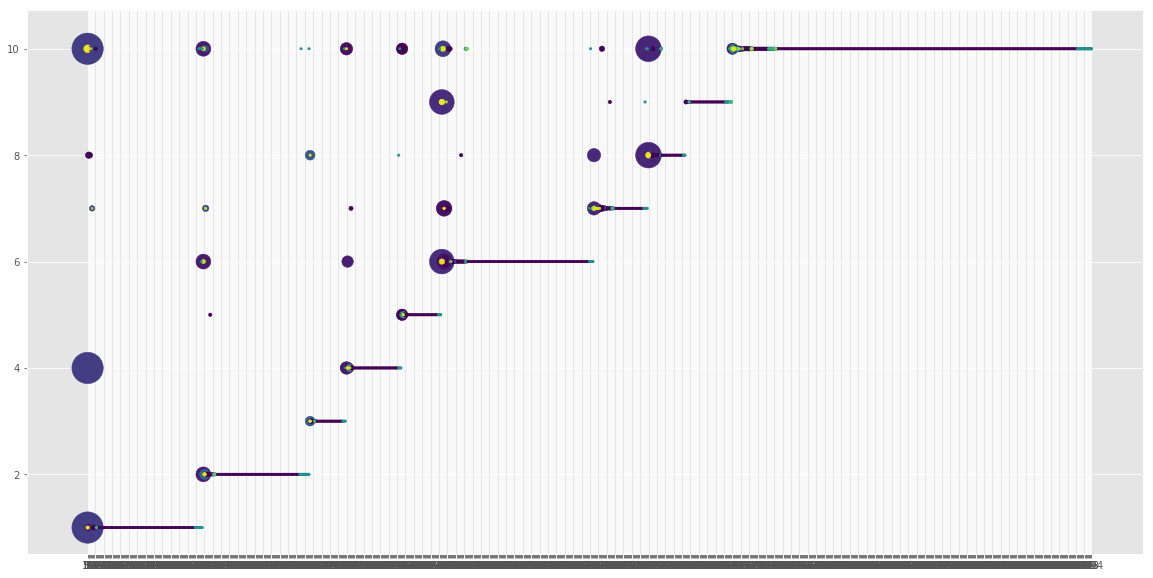

In [12]:
peptide_per_clonotype_by_gem_size(os2[(os2.umi_count_mhc >= 2) & (os2.delta_umi_mhc >= 1)], y='sample_id', save_tuba='specificity.os2.png', show=False)

In [ ]:
os1

In [18]:
os2.apply(lambda row: row.HLA_mhc in row.HLA_cd8, axis=1).astype(int)

0       0
1       1
2       1
3       1
4       0
       ..
2178    1
2179    0
2180    0
2181    1
2182    0
Length: 2183, dtype: int64

In [6]:
os1.fillna({'umi_count_mhc':0, 'delta_umi_mhc':0,
            'umi_count_TRA':0, 'delta_umi_TRA':0,
            'umi_count_TRB':0, 'delta_umi_TRB':0,
            'v_gene_TRA':'', 'j_gene_TRA':'', 'cdr3_TRA':'',
            'v_gene_TRB':'', 'j_gene_TRB':'', 'cdr3_TRB':''}, inplace=True)
os2.fillna({'umi_count_mhc':0, 'delta_umi_mhc':0,
            'umi_count_TRA':0, 'delta_umi_TRA':0,
            'umi_count_TRB':0, 'delta_umi_TRB':0,
            'v_gene_TRA':'', 'j_gene_TRA':'', 'cdr3_TRA':'',
            'v_gene_TRB':'', 'j_gene_TRB':'', 'cdr3_TRB':''}, inplace=True)

In [21]:
os2.columns

Index(['gem', 'clonotype', 'num_clonotype', 'ct', 'genes_TRA', 'genes_TRB',
       'genes_lst_TRA', 'genes_lst_TRB', 'length_TRA', 'cdr1_TRA', 'cdr2_TRA',
       'cdr3_TRA', 'umi_count_TRA', 'umi_count_lst_TRA', 'delta_umi_TRA',
       'cdr3_lst_TRA', 'chain_count_TRA', 'single_TRA', 'length_TRB',
       'cdr1_TRB', 'cdr2_TRB', 'cdr3_TRB', 'umi_count_TRB',
       'umi_count_lst_TRB', 'delta_umi_TRB', 'cdr3_lst_TRB', 'chain_count_TRB',
       'single_TRB', 'single_chain_only', 'umi_count_tcr', 'cdr3_comb',
       'v_gene_TRA', 'j_gene_TRA', 'v_gene_TRB', 'j_gene_TRB', 'tcr_category',
       'no_filtration', 'exclude_single-chain_TCRs',
       'exclude_ambiguous_and_single-chain_TCRs', 'exclude_ambiguous_TCRs',
       'label', 'umi_count_mhc', 'umi_count_lst_mhc', 'delta_umi_mhc',
       'single_barcode_mhc', 'multiplets_mhc', 'umi_count_cd8',
       'umi_count_lst_cd8', 'delta_umi_cd8', 'single_barcode_cd8',
       'multiplets_cd8', 'detected_response', 'peptide_assayed', 'sample_id',
 

1.0


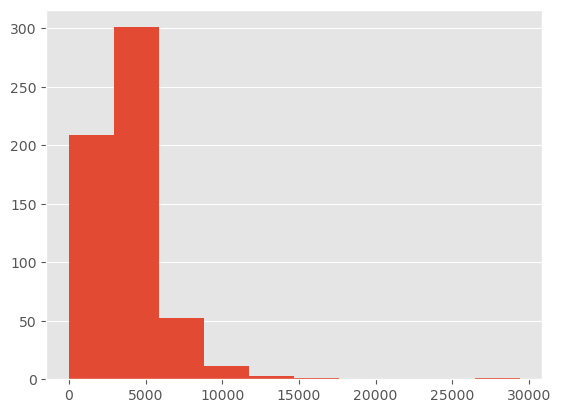

2.0


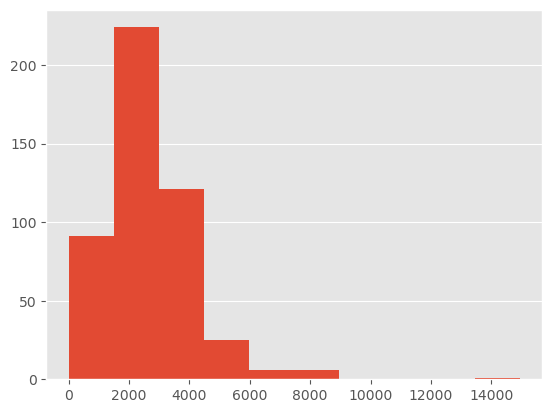

3.0


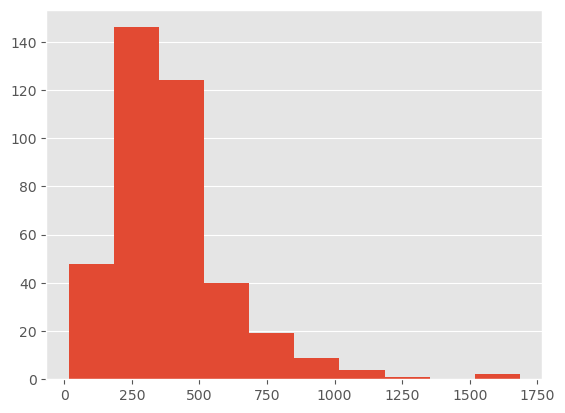

4.0


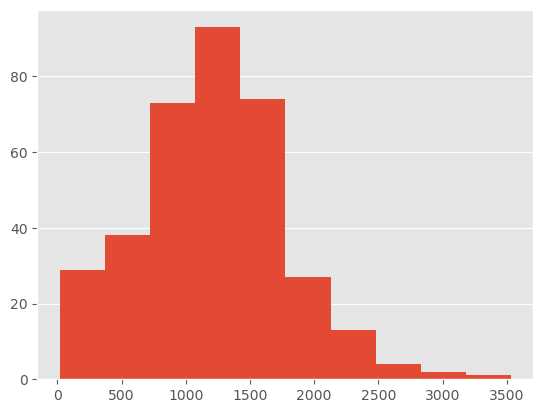

5.0


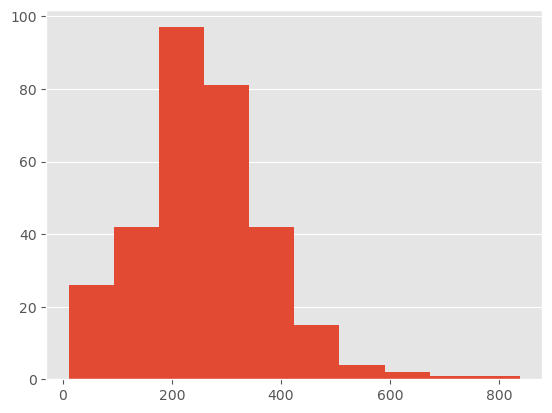

6.0


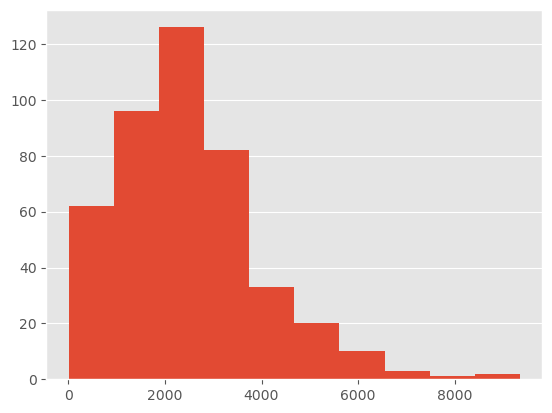

7.0


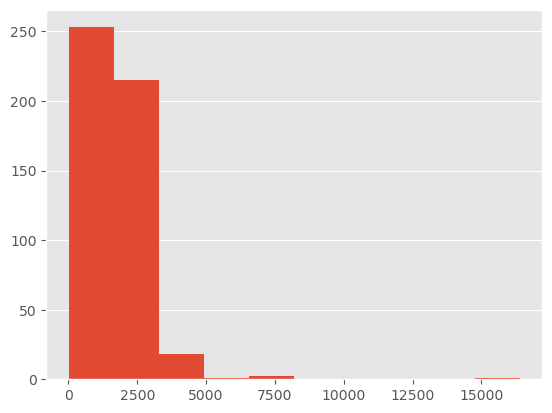

8.0


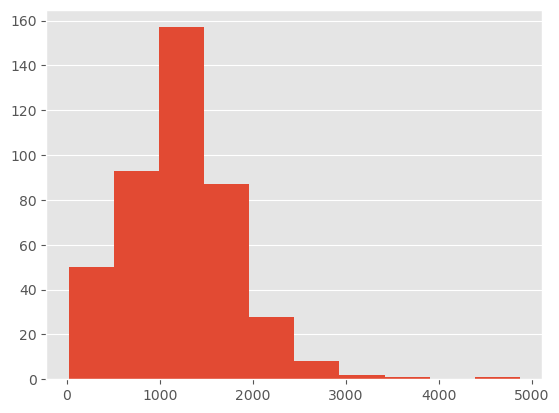

9.0


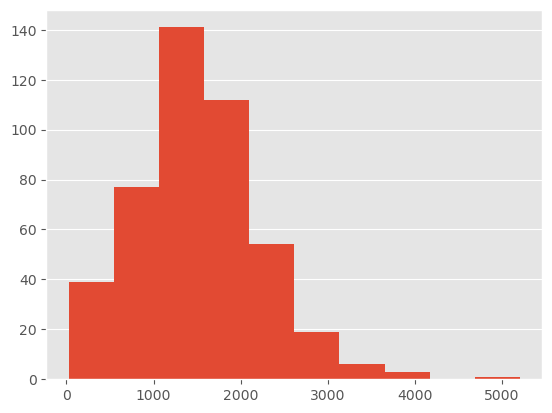

10.0


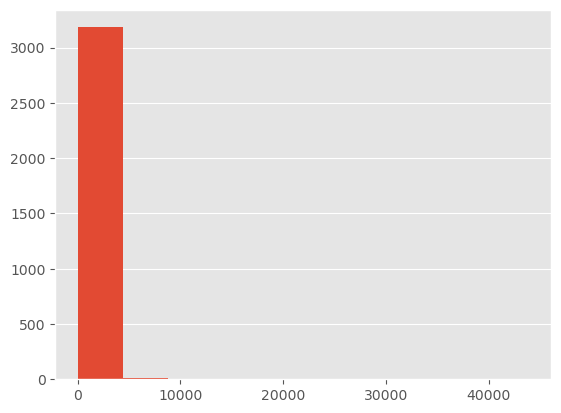

In [17]:
for sample, grp in os2.groupby('sample_id'):
    print(sample)
    plt.hist(grp.umi_count_cd8)
    plt.show()

1.0
Inside multiple_peptides_per_gem_w_filtering


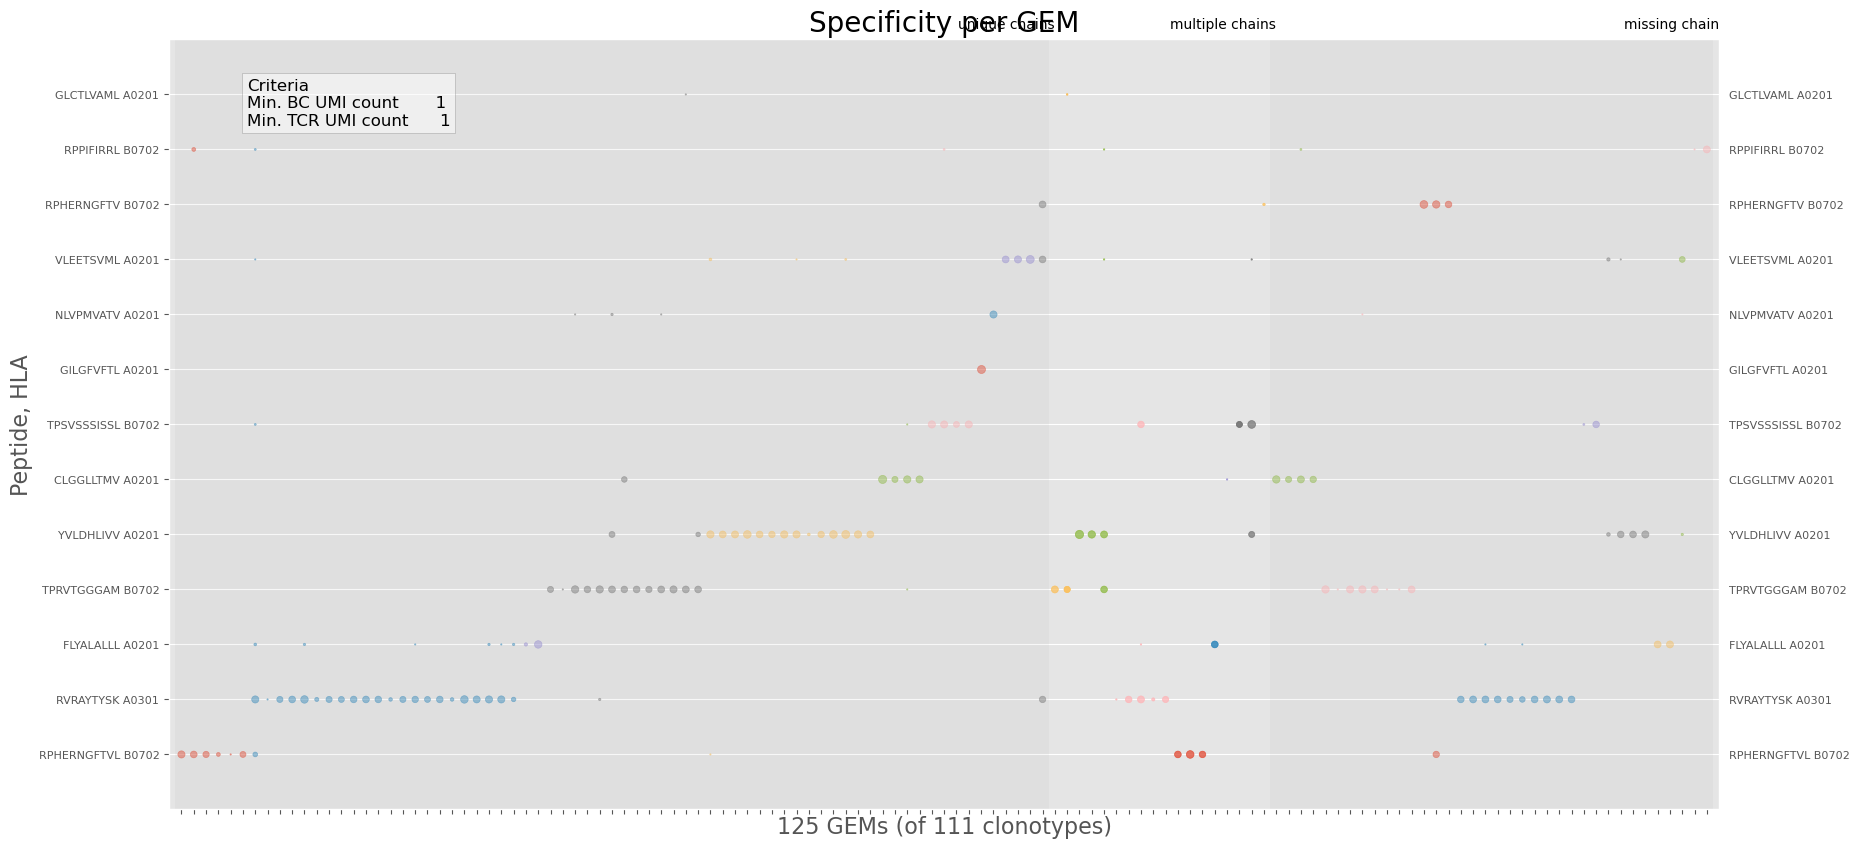

OBS! Figures are not saved!
2.0
Inside multiple_peptides_per_gem_w_filtering


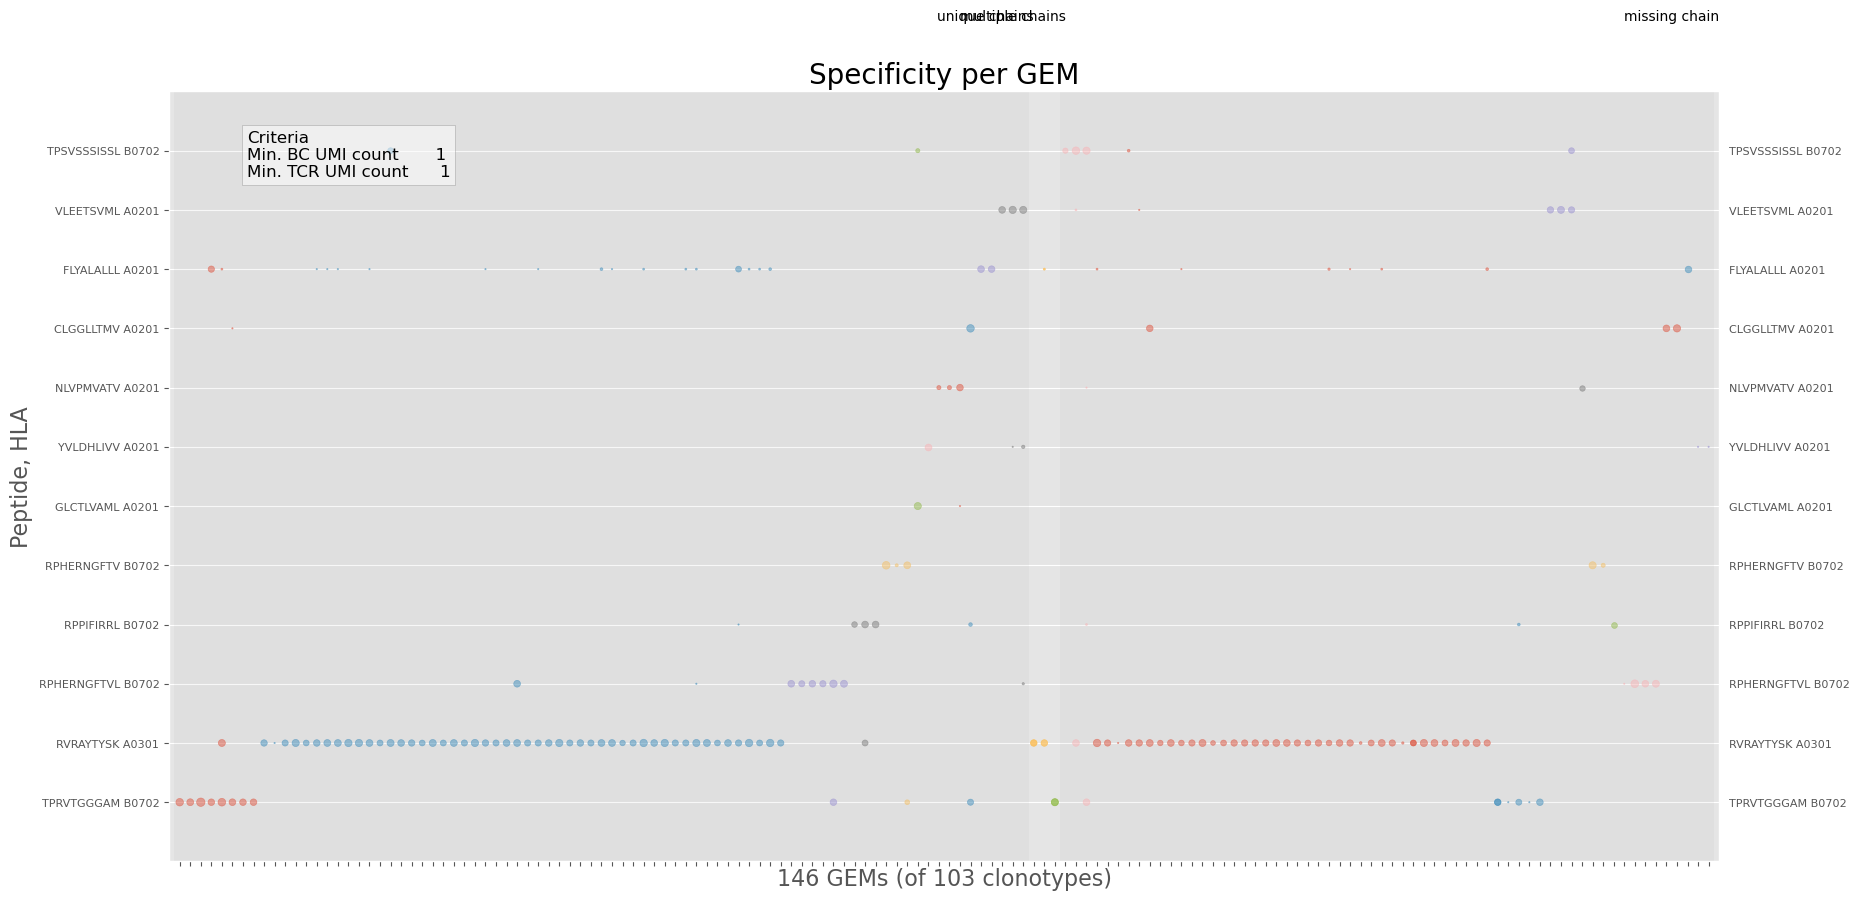

OBS! Figures are not saved!
3.0
Inside multiple_peptides_per_gem_w_filtering


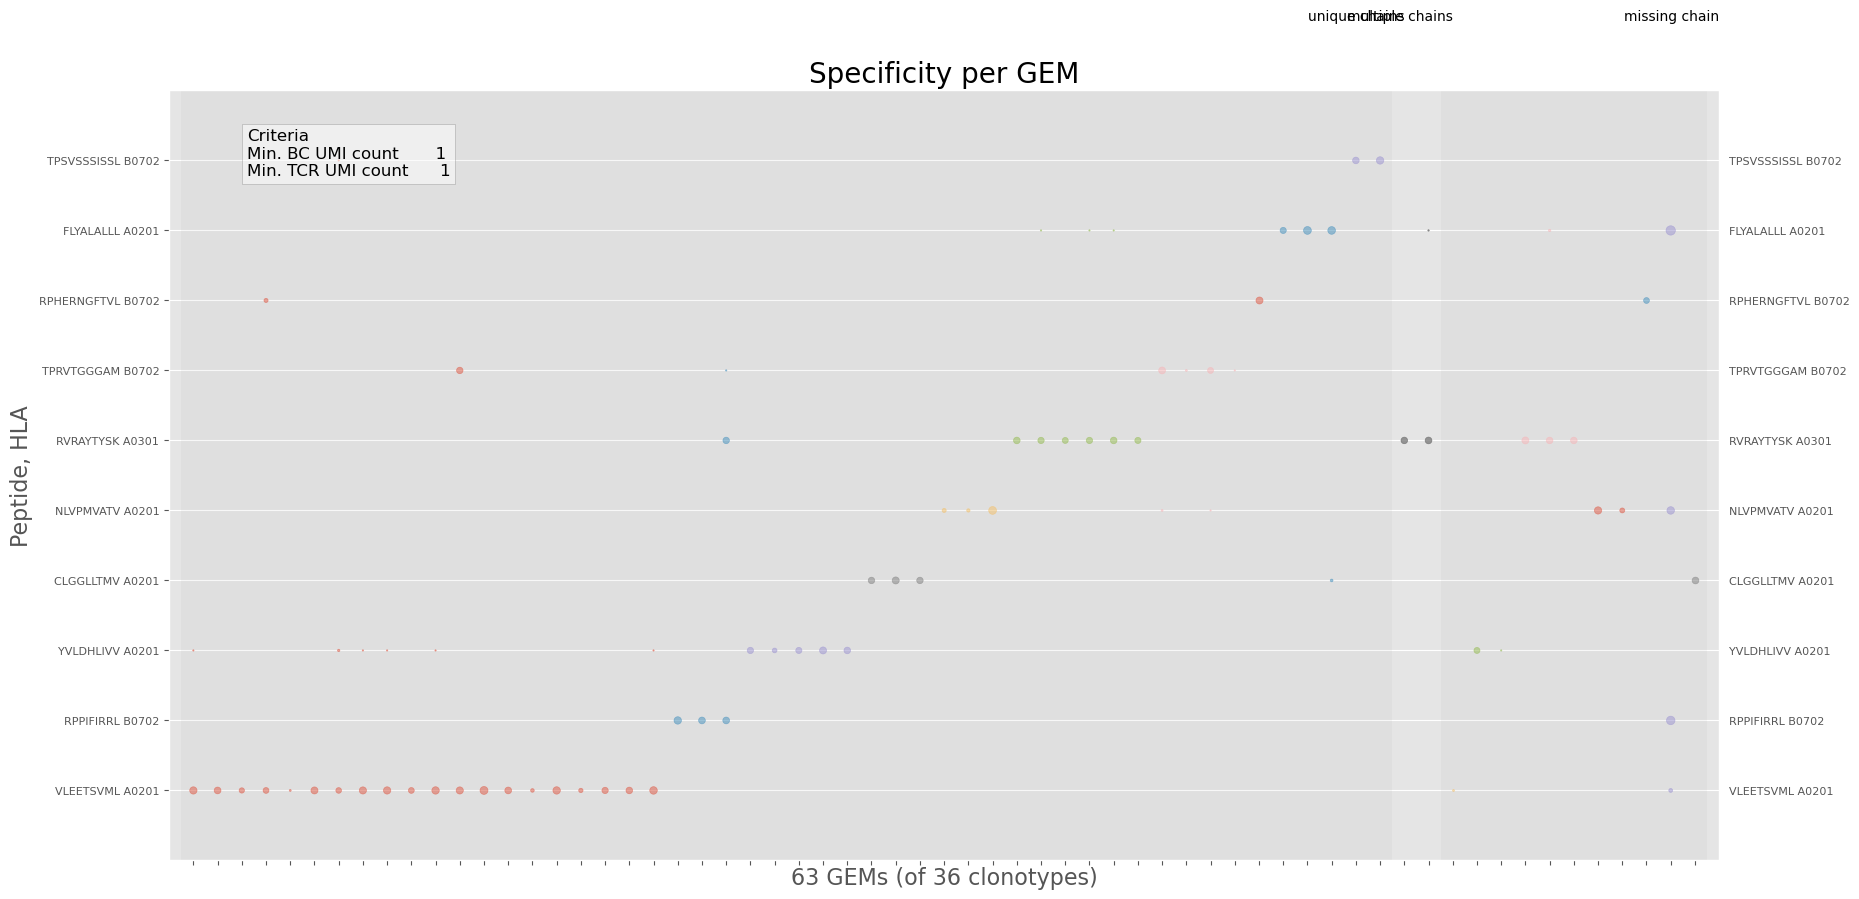

OBS! Figures are not saved!
4.0
Inside multiple_peptides_per_gem_w_filtering


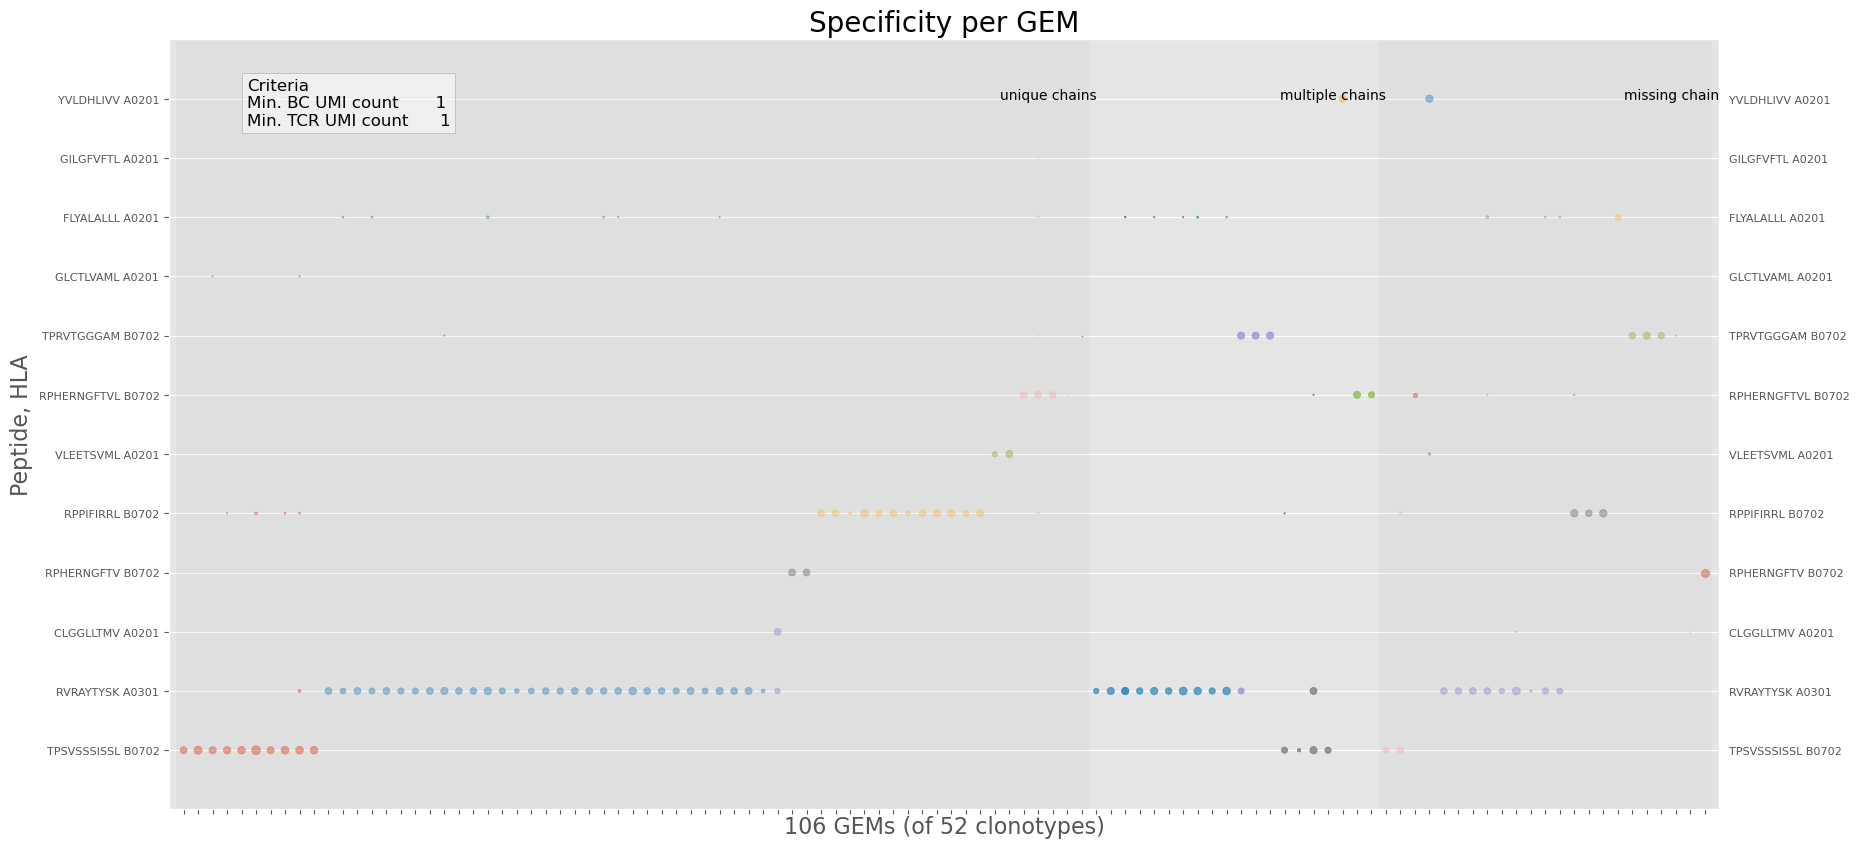

OBS! Figures are not saved!
5.0
Inside multiple_peptides_per_gem_w_filtering


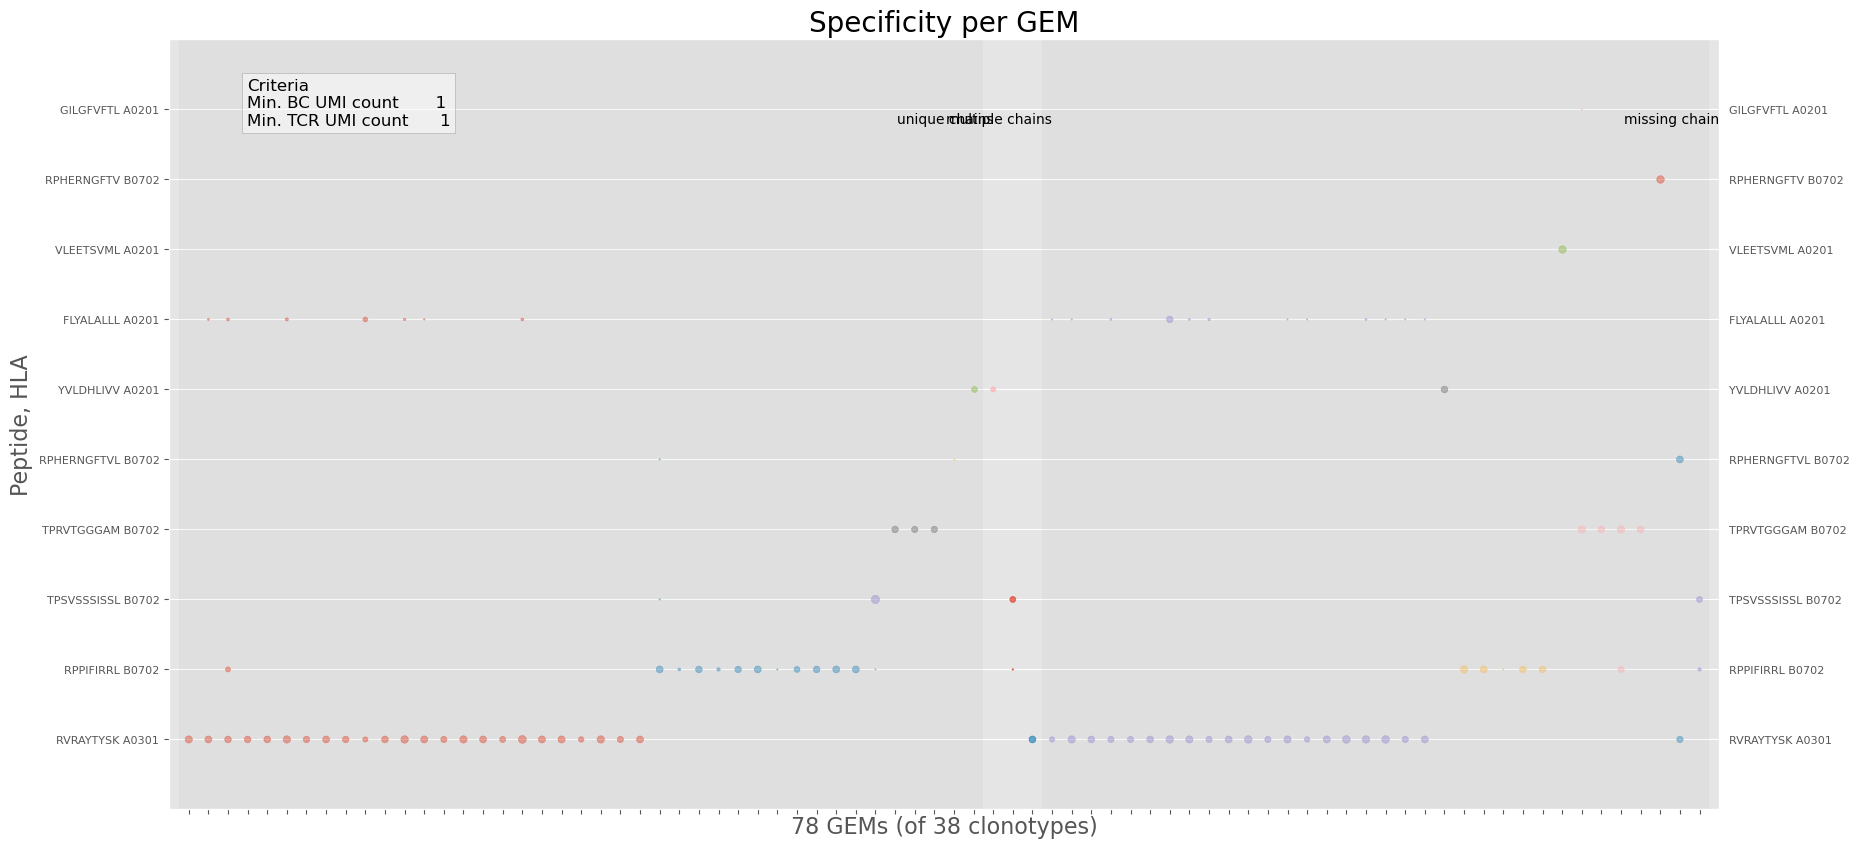

OBS! Figures are not saved!
6.0
Inside multiple_peptides_per_gem_w_filtering


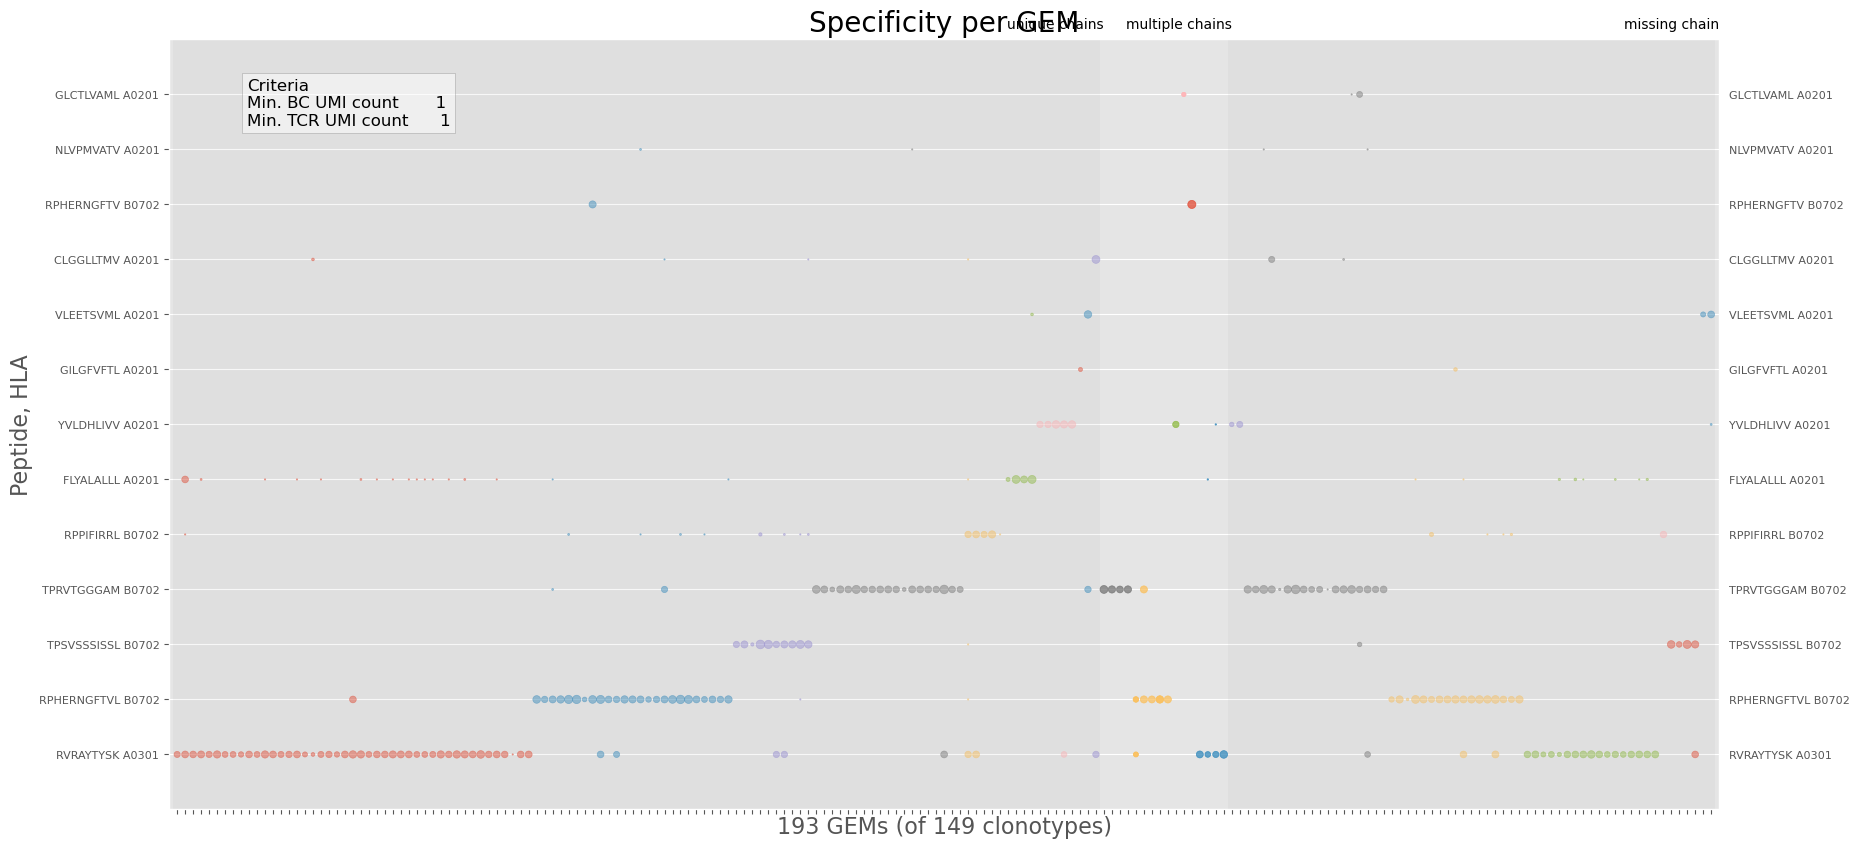

OBS! Figures are not saved!
7.0
Inside multiple_peptides_per_gem_w_filtering


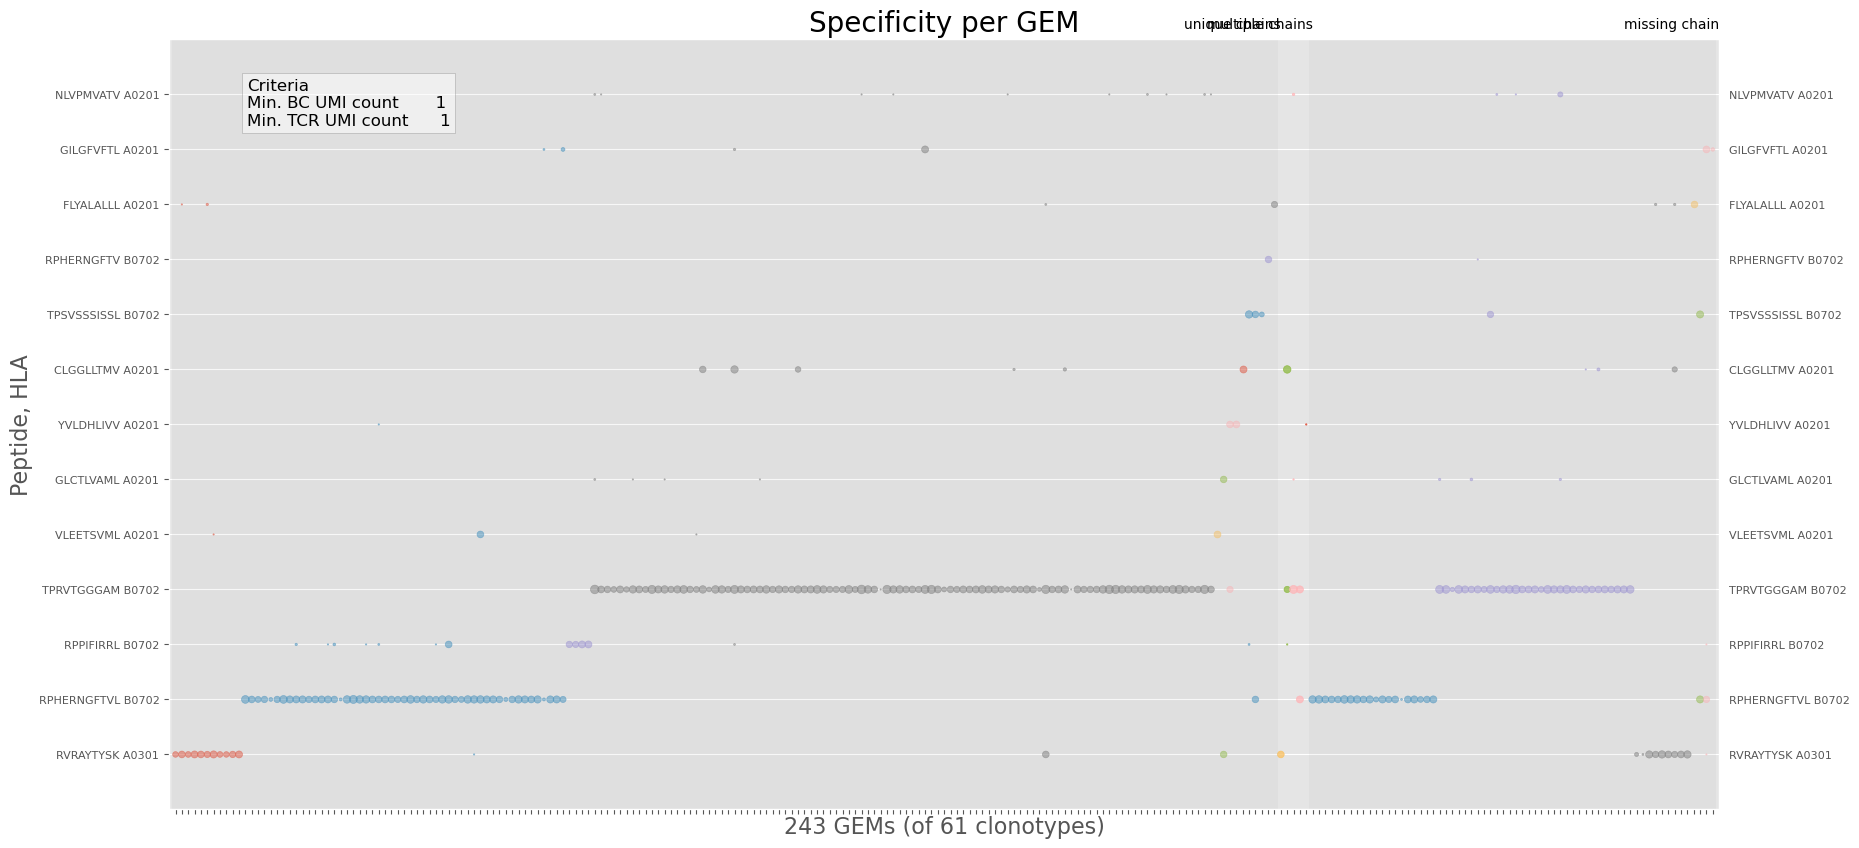

OBS! Figures are not saved!
8.0
Inside multiple_peptides_per_gem_w_filtering


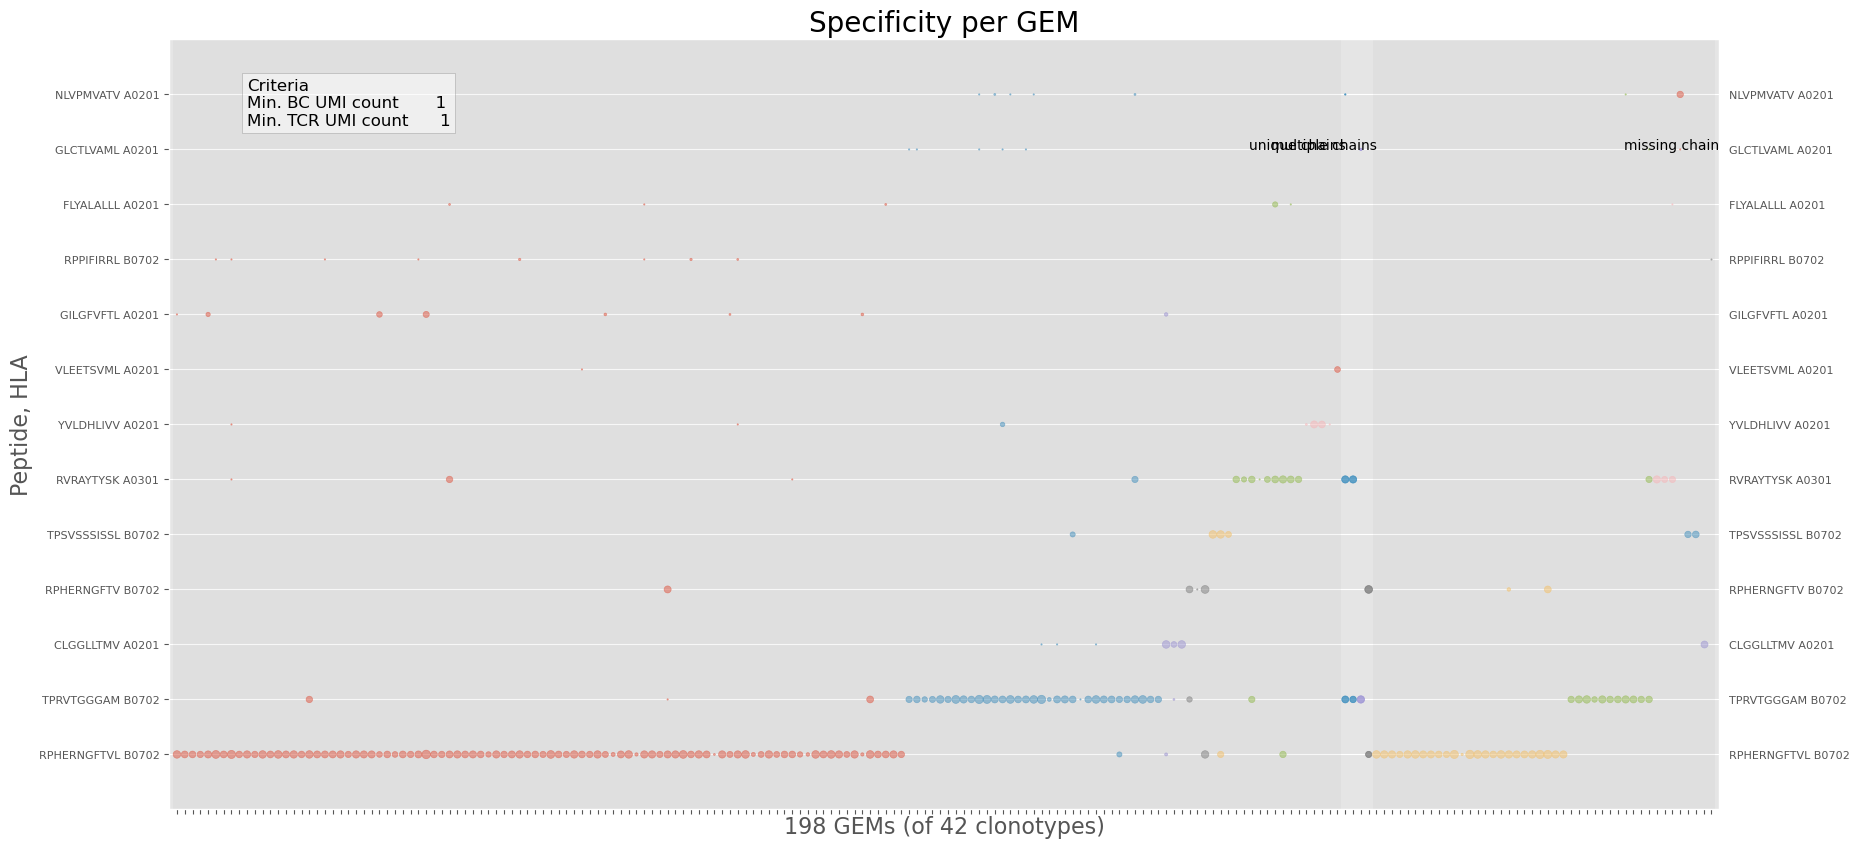

OBS! Figures are not saved!
9.0
Inside multiple_peptides_per_gem_w_filtering


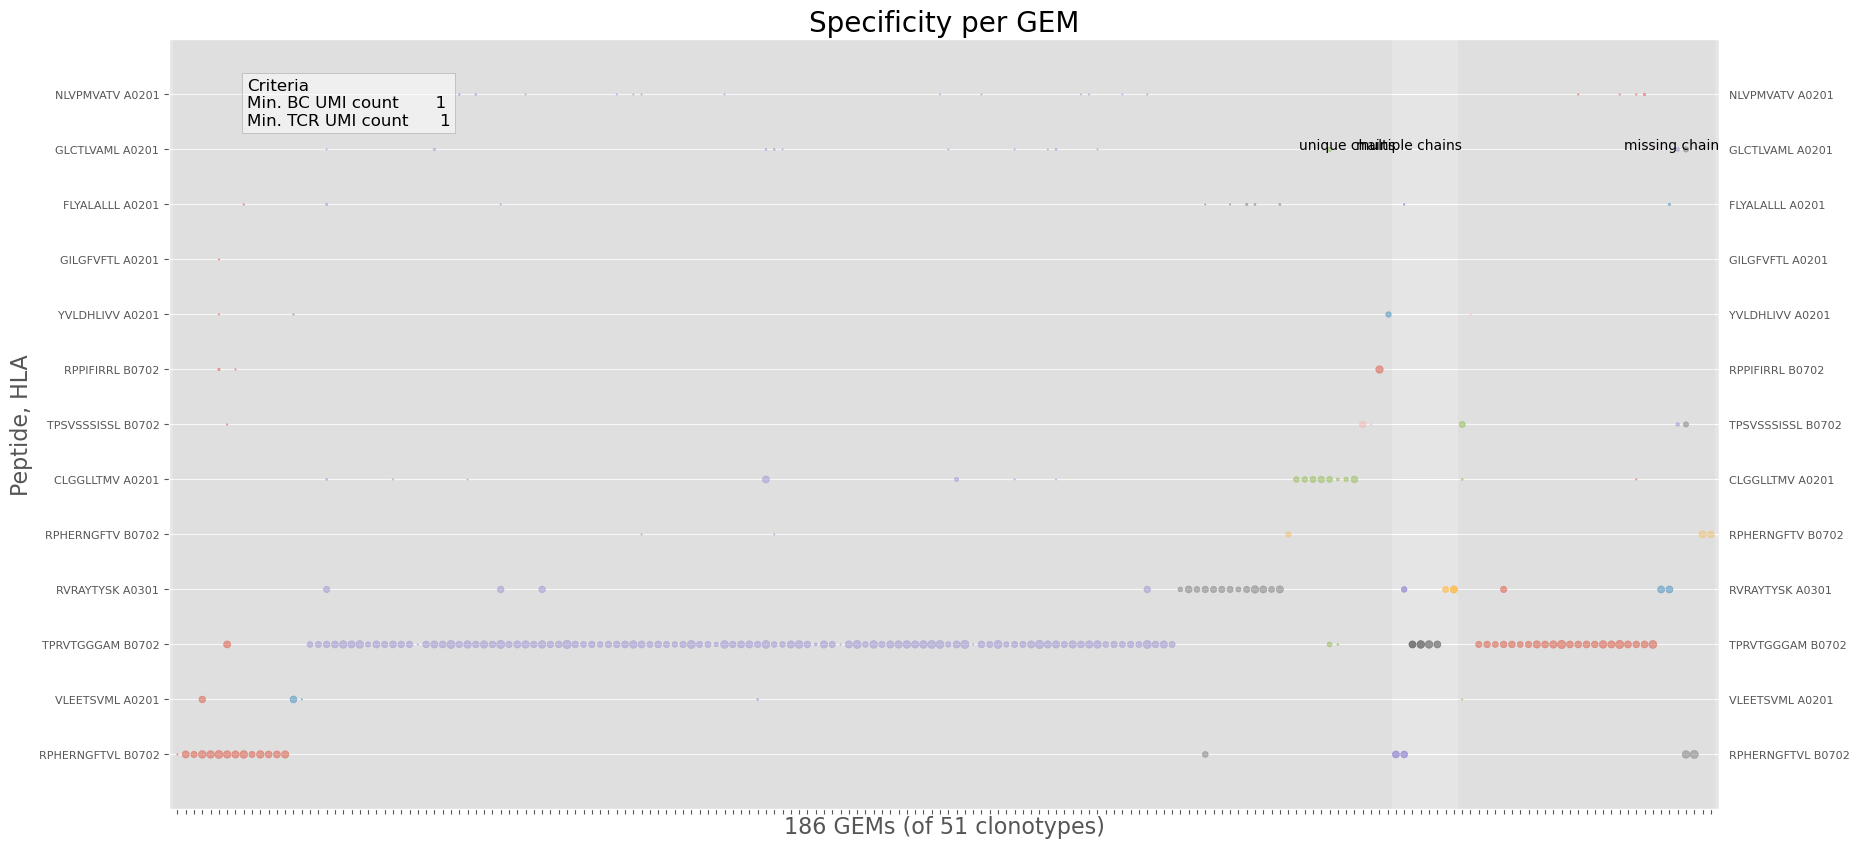

OBS! Figures are not saved!
10.0
Inside multiple_peptides_per_gem_w_filtering


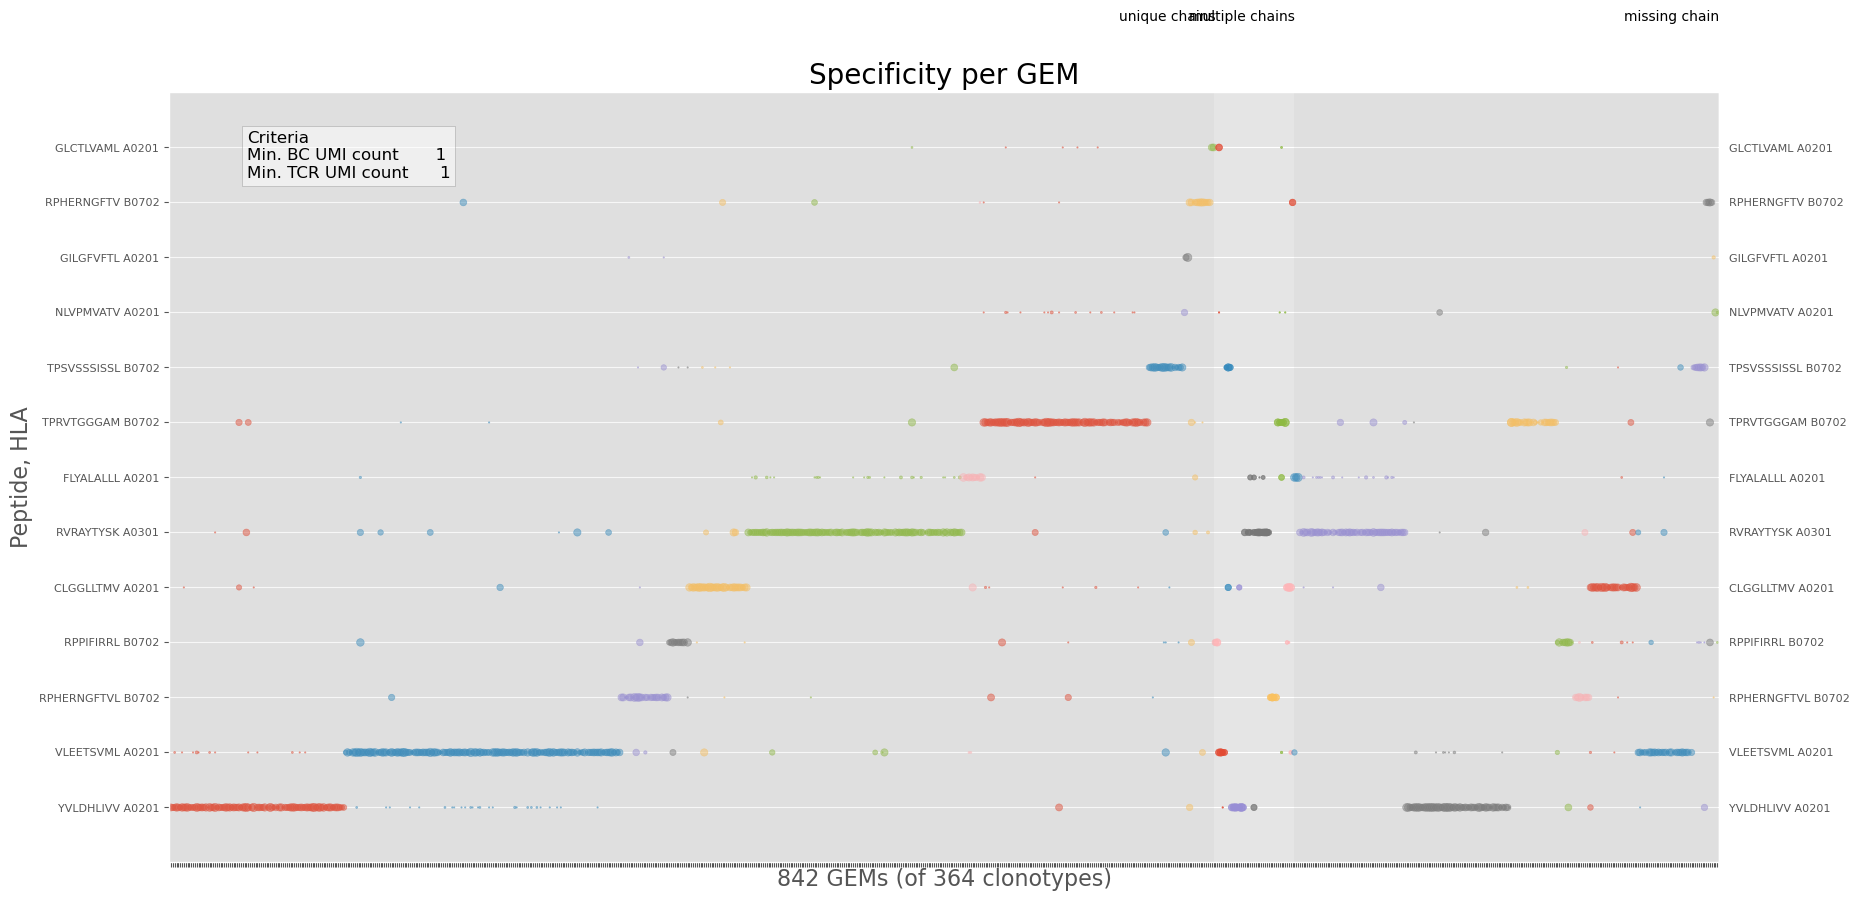

OBS! Figures are not saved!


In [11]:
for sample, grp in os1.groupby('sample_id'):
    print(sample)
    multiple_peptides_per_gem_w_filtering(grp, save_tuba=f'{sample}.png')
    

In [28]:
df = pd.merge(os1, os2, on='ct', how='outer', suffixes=['_os1','_os2'])

In [29]:
df

,gem_os1,clonotype_os1,num_clonotype_os1,ct,genes_TRA_os1,genes_TRB_os1,genes_lst_TRA_os1,genes_lst_TRB_os1,length_TRA_os1,cdr1_TRA_os1,...,single_barcode_mrk_os2,multiplets_mrk_os2,umi_count_mhc_rel_os2,gems_per_specificity_os2,gems_per_clonotype_os2,binding_concordance_os2,cdr3_TRA_substr_os2,cdr3_TRB_substr_os2,VDJdb_pep_os2,VDJdb_check_os2
0,AAACCTGAGCCCAGCT-1,clonotype4860,4860.0,4860.0,TRAV8-3;TRAJ10;TRAC,TRBV6-5;;TRBJ1-2;TRBC1,['TRAV8-3;TRAJ10;TRAC'],['TRBV2;;TRBJ1-3;TRBC1' 'TRBV6-5;;TRBJ1-2;TRBC1'],684.0,YGATPY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACCTGAGTCAATAG-1,clonotype2833,2833.0,2833.0,TRAV17;TRAJ38;TRAC,TRBV19;;TRBJ2-7;TRBC2,['TRAV17;TRAJ38;TRAC'],['TRBV19;;TRBJ2-7;TRBC2'],518.0,TSINN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAACCTGCAATCCGAT-1,clonotype4,4.0,4.0,TRAV1-1;TRAJ10;TRAC,TRBV5-1;;TRBJ2-5;TRBC2,['TRAV1-1;TRAJ10;TRAC'],['TRBV5-1;;TRBJ2-5;TRBC2'],496.0,TSGFYG,...,NaN,NaN,NaN,103.0,121.0,0.85124,NaN,NaN,NaN,NaN
3,AAACCTGCAATCCGAT-1,clonotype4,4.0,4.0,TRAV1-1;TRAJ10;TRAC,TRBV5-1;;TRBJ2-5;TRBC2,['TRAV1-1;TRAJ10;TRAC'],['TRBV5-1;;TRBJ2-5;TRBC2'],496.0,TSGFYG,...,NaN,NaN,NaN,103.0,121.0,0.85124,NaN,NaN,NaN,NaN
4,AAACCTGCAATCCGAT-1,clonotype4,4.0,4.0,TRAV1-1;TRAJ10;TRAC,TRBV5-1;;TRBJ2-5;TRBC2,['TRAV1-1;TRAJ10;TRAC'],['TRBV5-1;;TRBJ2-5;TRBC2'],496.0,TSGFYG,...,NaN,NaN,NaN,103.0,121.0,0.85124,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153177,NaN,NaN,NaN,3843.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.00000,NaN,NaN,NaN,NaN
153178,NaN,NaN,NaN,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153179,NaN,NaN,NaN,1752.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.00000,NaN,NaN,NaN,NaN
153180,NaN,NaN,NaN,1814.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.00000,NaN,NaN,NaN,NaN


In [1]:
df.fillna({'umi_count_mhc':0, 'delta_umi_mhc':0,
            'umi_count_TRA':0, 'delta_umi_TRA':0,
            'umi_count_TRB':0, 'delta_umi_TRB':0,
            'v_gene_TRA':'', 'j_gene_TRA':'', 'cdr3_TRA':'',
            'v_gene_TRB':'', 'j_gene_TRB':'', 'cdr3_TRB':''}, inplace=True)

NameError: name 'df' is not defined

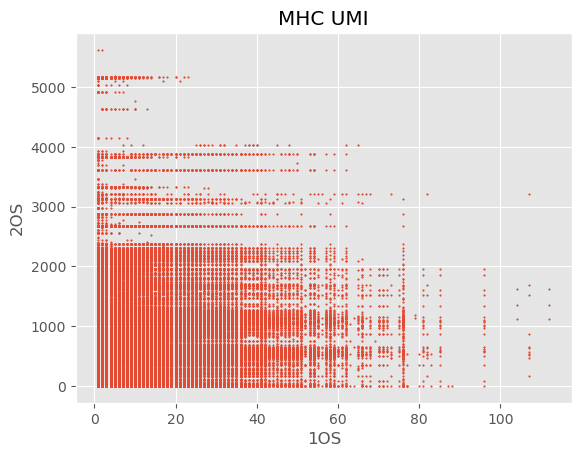

In [38]:
plt.scatter(df.umi_count_mhc_os1, df.umi_count_mhc_os2, s=1)
plt.xlabel('1OS')
plt.ylabel('2OS')
plt.title('MHC UMI')
plt.show()

In [25]:
os1.v_gene_TRA + ";" + os1.j_gene_TRA + ";" + os1.cdr3_TRA + "|" + os1.v_gene_TRB + ";" + os1.j_gene_TRB + ";" + os1.cdr3_TRB

0       TRAV8-3;TRAJ10;CAVGVRGGGNKLTF|TRBV6-5;TRBJ1-2;...
1       TRAV17;TRAJ38;CATFNAGNNRKLIW|TRBV19;TRBJ2-7;CA...
2       TRAV1-1;TRAJ10;CAVRAITGGGNKLTF|TRBV5-1;TRBJ2-5...
3       TRAV21;TRAJ33;CAVLMDSNYQLIW|TRBV10-2;TRBJ1-1;C...
4       TRAV17;TRAJ12;CATVVRMDSSYKLIF|TRBV7-9;TRBJ2-1;...
                              ...                        
7106                       ;;|TRBV28;TRBJ2-7;CASSYVGYEQYF
7107                 ;;|TRBV6-1;TRBJ2-7;CASSGAPGRNPFYEQYF
7108                  ;;|TRBV20-1;TRBJ2-1;CSASRQGGFGNEQFF
7109                     ;;|TRBV19;TRBJ1-5;CASSSTGGNQPQHF
7110                  ;;|TRBV5-1;TRBJ2-5;CASSTPSSGPQETQYF
Length: 7111, dtype: object